In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.complete_graph(4)
edges = list(G.edges)
str_edges = [f"{e[0]} {e[1]}" for e in edges]
str_edges

['0 1', '0 2', '0 3', '1 2', '1 3', '2 3']

In [3]:
for i in range(len(G)):
    if G.has_edge(i,i):
        print("Has loop")

In [4]:
if G.number_of_edges() != len(edges):
    print("Graph G has duplicate edges")
else:
    print("Graph G does not have duplicate edges")

Graph G does not have duplicate edges


In [5]:
import numpy as np

In [6]:
import statistics as st
n = 10
mean = 4
var = 0.25
theta = var/(mean-1)
k = (mean-1)/theta
samples = np.random.gamma(k-1,theta,n)
deg = [int(x) + 1 for x in list(samples)]
samples, deg

st.mean(deg), st.variance(deg), st.mean(samples), st.variance(samples), samples

(3.2,
 0.4,
 np.float64(2.627600535845901),
 np.float64(0.32742661026148184),
 array([2.5289459 , 2.71085145, 2.80463611, 2.04907782, 3.22352011,
        3.25590913, 2.2345207 , 2.72691966, 1.49960688, 3.24201761]))

(array([1., 0., 6., 3.]),
 array([2. , 2.5, 3. , 3.5, 4. ]),
 <BarContainer object of 4 artists>)

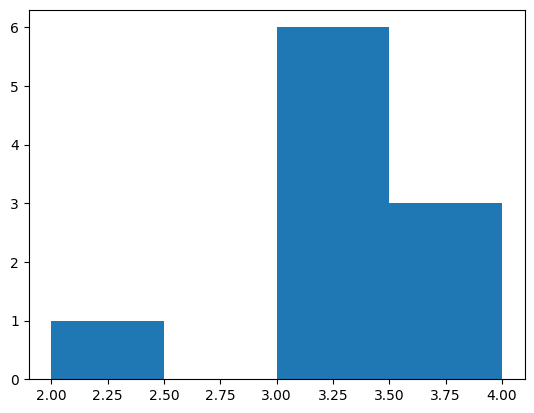

In [7]:
plt.hist(deg,bins=4)

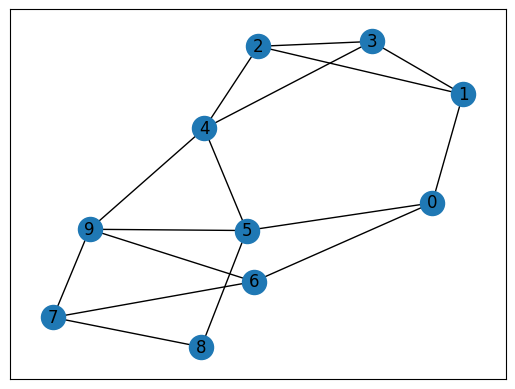

In [8]:
G = nx.havel_hakimi_graph(deg)
nx.draw_networkx(G)

In [28]:
def read_graph(path:str)->nx.Graph:
    edges = []
    with open(path) as f:
        edges = [tuple(map(int, x.strip().split())) for x in f.readlines()]
    G = nx.Graph()
    for e in edges:
        G.add_edge(e[0],e[1])
    return G

In [24]:
G = read_graph("../data/networks/test.txt")

[(0, 1), (2, 1), (3, 1), (0, 2), (3, 2)]


In [10]:
def havel_hakimi(deg_seq: list) -> nx.Graph:
    """Generates a graph from a given degree sequence using the Havel-Hakimi algorithm.

    Args:
        deg_seq (list): Degree sequence of the graph

    Returns:
        nx.Graph: Graph generated from the degree sequence
    """
    G = nx.Graph()
    G.add_nodes_from(range(len(deg_seq)))
    deg_seq = sorted(deg_seq, reverse=True)
    deg_seq = [list(x) for x in zip(range(len(deg_seq)), deg_seq)]
    edges = []

    while deg_seq:
        # Pick the vertex with lowest degree
        v = deg_seq.pop()
        # If the degree is greater than the number of remaining vertices, return None
        if v[1] > len(deg_seq):
            return None
        # Connect the vertex to the v vertices having the highest remaining degree
        for i in range(v[1]):
            deg_seq[i][1] -= 1
            edges.append((v[0], deg_seq[i][0]))
        # Remove the vertex from the list if its degree is 0
        deg_seq = [d for d in deg_seq if d[1] != 0]
        deg_seq = sorted(deg_seq, key=lambda x: x[1], reverse=True)
    
    G.add_edges_from(edges)
    
    return G

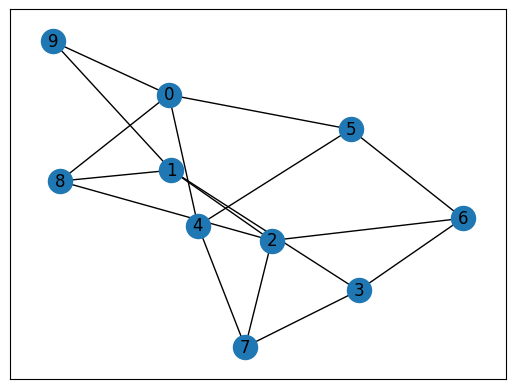

In [11]:
G = havel_hakimi(deg)
nx.draw_networkx(G)

In [12]:
G1 = read_graph("../data/networks/hetero_deg_var_3.txt")
nx.is_connected(G1)

True

In [13]:
G2 = read_graph("../data/networks/hetero_deg_var_1.txt")
nx.is_connected(G2)

True

In [14]:
G3 = read_graph("../data/networks/hetero_deg_var_6.txt")
nx.is_connected(G3)

True

In [15]:
import random

def connect_disconnected_components(G):
    G1 = G.copy()
    # Find all connected components
    components = list(nx.connected_components(G))
    
    # While there are more than one component, connect them
    while len(components) > 1:
        # Pick two components to connect
        comp1 = components.pop()
        comp2 = components.pop()
        
        # Find nodes with the highest degree in each component
        node1 = max(comp1, key=lambda x: G1.degree[x])
        node2 = max(comp2, key=lambda x: G1.degree[x])
        
        # Rewire an edge from node1 to node2
        if len(comp1)==2 or len(comp2)==2:
            G1.add_edge(node1, node2)
        else:
            x = random.choice(list(G1.neighbors(node1)))
            y = random.choice(list(G1.neighbors(node2)))
            G1.remove_edge(node1, x)
            G1.remove_edge(node2, y)
            G1.add_edge(node1, y)
            G1.add_edge(node2, x)
        
        
        # Merge the two components and add back to the list
        new_component = comp1.union(comp2)
        components.append(new_component)
        print(nx.number_connected_components(G1))
    
    return G1

In [284]:
import os

graphs = [x for x in os.listdir("../data/networks/") if x.endswith(".txt")]
graphs


['hetero_deg_var_30.35.txt',
 'hetero_deg_var_4.46.txt',
 'hetero_deg_var_8.76.txt',
 'homog_comp.txt',
 'test.txt']

In [285]:
import statistics as st
import numpy as np
for g in graphs:
    G = read_graph(f"../data/networks/{g}")
    print(f"V: {G.number_of_nodes()}, E: {G.number_of_edges()}")
    print(f"I connnected: {nx.is_connected(G)}, # connected components: {nx.number_connected_components(G)}")
    print(f"Mean: {np.mean([G.degree(n) for n in G.nodes])}, Variance: {np.var([G.degree(n) for n in G.nodes])}")

V: 1000, E: 1982
I connnected: True, # connected components: 1
Mean: 3.964, Variance: 30.346704000000006
V: 1000, E: 2048
I connnected: True, # connected components: 1
Mean: 4.096, Variance: 4.460783999999999
V: 1000, E: 1949
I connnected: True, # connected components: 1
Mean: 3.898, Variance: 8.761596
V: 1000, E: 499500
I connnected: True, # connected components: 1
Mean: 999.0, Variance: 0.0
V: 4, E: 5
I connnected: True, # connected components: 1
Mean: 2.5, Variance: 0.25


In [15]:
round(1.4), round(2.7)

(1, 3)

In [45]:
path = "../data/networks/hetero_deg_var_3.txt"
edges = []
with open(path) as f:
    edges = ' '.join([x.strip() for x in f.readlines()])
edges = set([int(x) for x in edges.split()])
len(edges)

1000

In [48]:
iso = [(1,2), (4,3), (7,2)]
dict(enumerate([x[0] for x in iso]))

{0: 1, 1: 4, 2: 7}

In [265]:
from scipy.stats import gamma
import random

mean = 4
vars = [1,3,6]
n = 10
theta = vars[0]/(mean-1)
k = (mean-1)**2/vars[0]
samples = gamma.rvs(k, scale=theta, size=len(vars)*n, random_state=42)
samples

array([3.40424567, 2.75532222, 2.66515074, 2.66516601, 4.73219879,
       3.7093128 , 2.45224614, 3.45468444, 3.13289259, 1.38874056,
       2.0046145 , 3.20836444, 4.57902382, 2.6729487 , 2.38693395,
       2.99911079, 2.33865457, 2.61199767, 2.8756642 , 1.97029345,
       3.77356717, 1.84884256, 1.77171387, 3.08640818, 3.67583249,
       3.06033786, 2.77688202, 2.60337303, 2.46002751, 4.05537167])

In [266]:
s = []
random.shuffle(samples)
for i in range(len(vars)):
    s.append([round(x) + 1 for x in samples[i*n:(i+1)*n]])
for i in range(len(vars)):
    print("Mean: ", np.mean(s[i]), "Variance: ", np.var(s[i]))

Mean:  4.3 Variance:  0.8099999999999999
Mean:  4.1 Variance:  0.69
Mean:  3.4 Variance:  0.44000000000000006


In [267]:
act_means = [np.mean(sample) for sample in s]
for i in range(1, len(vars)):
    for j in range(len(s[i]) - 1):
        p = np.random.random() * vars[i]
        s[i][j] += (act_means[0] - act_means[i]) - p
        s[i][j + 1] += (act_means[0] - act_means[i]) + p
    s[i] = [round(x) + 1 for x in s[i]]

In [268]:
# for i in range(1,len(vars)):
#     print(f"Before: {s[i]}")
#     samp_var = np.var(s[i])
#     s[i] = [(x/samp_var)*vars[i] for x in s[i]]
#     # samp_mean = np.mean(s[i])
#     # s[i] = [x + abs(mean - samp_mean) for x in s[i]]
#     s[i] = [round(x) + 1 for x in s[i]]
#     print(f"After: {s[i]}")
for i in range(len(vars)):
    print("Mean: ", np.mean(s[i]), "Variance: ", np.var(s[i]))

Mean:  4.3 Variance:  0.8099999999999999
Mean:  5.5 Variance:  2.45
Mean:  5.9 Variance:  8.09


In [281]:
m = 4
v = [1,3,6]
n = 10
s = []
for i in range(len(vars)):
    s.append([round(x) + 1 for x in gamma.rvs((m-1)**2/v[i], scale=v[i]/(m-1), size=n, random_state=42)])

for i in range(len(vars)):
    print("Mean: ", np.mean(s[i]), "Variance: ", np.var(s[i]))

Mean:  4.0 Variance:  1.0
Mean:  4.0 Variance:  2.0
Mean:  4.0 Variance:  4.4
